In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/brownfields_data_with_county_geoid.csv')
df.head()

/Users/dineshmurali/miniconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,20,21,22,23,43,44,46,48,53,57,61,62,64,65,67,68,69,74,76,77,78,86,87,89,98) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Grant Recipient Name,Accomplishment Counted,Cooperative Agreement Number,Type of Brownfields Grant,ACRES Property ID,Property Name,Property Address 1,Property City,Property State,Property Zip Code,...,Radius,EPA Region,Grant ID,Highlights,Program Code,Stcntrbg,ASSESSMENT YEAR,ROW COUNT,GEOID,COUNTY NAME
0,Tuscola Cty Brownfield RA,NaN,00E46901,Assessment,97204,Proposed Industrial Park,M-24,Mayville,MI,48744,...,0.5,5,69599367.0,The project was able to facilitate the receipt...,BF,NaN,NaN,2,26157.0,Tuscola
1,South St. Paul Housing and Redevelopment Autho...,Y,96596801,Assessment,96617,575/A HARDMAN AVE,575/A HARDMAN AVE,South St. Paul,MN,55075,...,0.5,5,69598371.0,Former Use: Historic land use of the Bridgepoi...,BF,NaN,2006.0,1,27037.0,Dakota
2,Missouri Department of Natural Resources,Y,98727702,Section 128(a) State/Tribal,96908,2932 Thomas St,2932 Thomas St,St. Louis,MO,63106,...,0.5,7,69598549.0,Former Use: 52 vacant lots in the City of St. ...,RP,NaN,2008.0,1,29510.0,St. Louis City
3,Missouri Department of Natural Resources,Y,98727702,Section 128(a) State/Tribal,96924,2946 Thomas St,2946 Thomas St,St. Louis,MO,63106,...,0.5,7,69598549.0,Former Use: 52 vacant lots in the City of St. ...,RP,NaN,2008.0,1,29510.0,St. Louis City
4,Missouri Department of Natural Resources,Y,98727702,Section 128(a) State/Tribal,96925,2947 Thomas Ave,2947 Thomas Ave,St. Louis,MO,63103,...,0.5,7,69598549.0,Former Use: 52 vacant lots in the City of St. ...,RP,NaN,2008.0,1,29510.0,St. Louis City


In [ ]:
df.shape

In [5]:
study_fields = ['Property  State','Property Zip Code'
                     ,'Property Latitude','Property Longitude'
                     ,'Assessment Phase','Assessment Start Date','Assessment Completion Date'
                    ,'Amt of Assessment Funding','Amount of Cleanup Funding']
data_for_study = df[study_fields]
print(data_for_study.shape)

(78527, 9)


In [6]:
print(data_for_study.dtypes)

Property  State                object
Property Zip Code              object
Property Latitude              object
Property Longitude             object
Assessment Phase               object
Assessment Start Date          object
Assessment Completion Date     object
Amt of Assessment Funding     float64
Amount of Cleanup Funding     float64
dtype: object


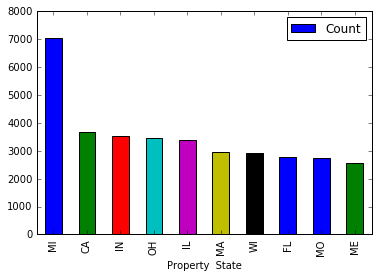

In [29]:
%matplotlib inline
num_sites_by_state = data_for_study.groupby('Property  State').size().reset_index().rename(columns = {0:'Count'})
num_sites_by_state_top_10 = by_state.sort_values(by='Count', ascending=False)[:10]
num_sites_by_state_top_10.plot(x='Property  State', y='Count',kind='bar')

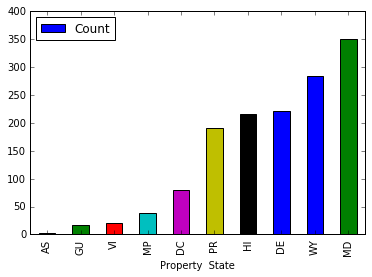

In [30]:
num_sites_by_state_bottom_10 = by_state.sort_values(by='Count')[:10]
num_sites_by_state_bottom_10.plot(x='Property  State', y='Count',kind='bar')

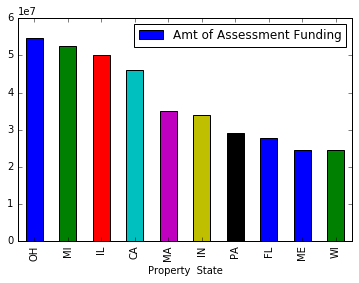

In [35]:
amt_by_state = data_for_study.groupby('Property  State')[['Amt of Assessment Funding']].sum().reset_index()
amt_by_state_top_10 = amt_by_state.sort_values(by='Amt of Assessment Funding', ascending=False)[:10]
amt_by_state_top_10.plot(x='Property  State', y='Amt of Assessment Funding',kind='bar')

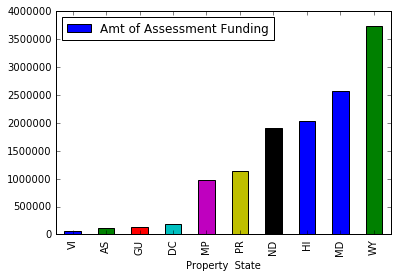

In [36]:
amt_by_state_bottom_10 = amt_by_state.sort_values(by='Amt of Assessment Funding')[:10]
amt_by_state_bottom_10.plot(x='Property  State', y='Amt of Assessment Funding',kind='bar')

In [2]:
cleanup_fields = [col for col in df.columns if col.startswith('Cntmnt') 
                       or col.startswith('Media') 
                       or col == 'Cleanup Required'
                     and col not in ['Cntmnt Fnd-Other (Descr)','Cntmnt Clnd Up-Other (Descr)']]
cleanup_fields

['Cleanup Required',
 'Cntmnt Fnd-Arsenic',
 'Cntmnt Fnd-Asbestos',
 'Cntmnt Fnd-Cadmium',
 'Cntmnt Fnd-Chromium',
 'Cntmnt Fnd-Ctrl Sbstncs',
 'Cntmnt Fnd-Copper',
 'Cntmnt Fnd-Iron',
 'Cntmnt Fnd-Lead',
 'Cntmnt Fnd-Mercury',
 'Cntmnt Fnd-Nickel',
 'Cntmnt Fnd-None',
 'Cntmnt Fnd-Other',
 'Cntmnt Fnd-Other Metals',
 'Cntmnt Fnd-PAHs',
 'Cntmnt Fnd-PCBs',
 'Cntmnt Fnd-Pesticides',
 'Cntmnt Fnd-Petroleum',
 'Cntmnt Fnd-Selenium',
 'Cntmnt Fnd-SVOCs',
 'Cntmnt Fnd-Unknown',
 'Cntmnt Fnd-VOCs',
 'Cntmnt Clnd Up-Arsenic',
 'Cntmnt Clnd Up-Asbestos',
 'Cntmnt Clnd Up-Cadmium',
 'Cntmnt Clnd Up-Chromium',
 'Cntmnt Clnd Up-Ctrl Sbstncs',
 'Cntmnt Clnd Up-Copper',
 'Cntmnt Clnd Up-Iron',
 'Cntmnt Clnd Up-Lead',
 'Cntmnt Clnd Up-Mercury',
 'Cntmnt Clnd Up-Nickel',
 'Cntmnt Clnd Up-None',
 'Cntmnt Clnd Up-Other',
 'Cntmnt Clnd Up-Other Metals',
 'Cntmnt Clnd Up-PAHs',
 'Cntmnt Clnd Up-PCBs',
 'Cntmnt Clnd Up-Pesticides',
 'Cntmnt Clnd Up-Petroleum',
 'Cntmnt Clnd Up-Selenium',
 'Cntmnt Clnd Up-

In [7]:
print(df[cleanup_fields].shape)

(78527, 63)


In [3]:
cleanup_data = df[cleanup_fields]
cleanup_data.groupby('Cleanup Required').size()

Cleanup Required
N    19275
U    19712
Y    34388
u        5
dtype: int64

In [4]:
cleanup_required_confirmed = cleanup_data[(cleanup_data['Cleanup Required'] == 'Y') |
                                         (cleanup_data['Cleanup Required'] == 'N')]
cleanup_required_confirmed.groupby('Cleanup Required').size()

Cleanup Required
N    19275
Y    34388
dtype: int64

In [5]:
cleanup_required_conf_final = pd.DataFrame()
for col in cleanup_required_confirmed.columns:
    #cleanup_required_confirmed[col] = cleanup_required_confirmed[col].astype(bool)
    cleanup_required_conf_final[col] = np.where(cleanup_required_confirmed[col] == 'Y', 1, 0)
    
print(cleanup_required_confirmed.shape)
print(cleanup_required_conf_final.shape)

(53663, 63)
(53663, 63)


In [61]:
cleanup_required_confirmed.groupby('Cleanup Required').size()

Cleanup Required
N    19275
Y    34388
dtype: int64

In [62]:
cleanup_required_conf_final.groupby('Cleanup Required').size()

Cleanup Required
0    19275
1    34388
dtype: int64

In [14]:
def searchBestModelParameters(algorithm, trainingData, y_train, target_var, scoring):
    #using randomforest
    if algorithm == 'rf':
        numTrees = range(10, 100, 10)
        numMinLeafSamples = range(2, 20, 2)
        numMinSamplesSplit = range(2, 20, 3)
        paramDistribution = dict(n_estimators = numTrees
                                 ,min_samples_leaf = numMinLeafSamples
                                 ,min_samples_split = numMinSamplesSplit
                                )
        model = RandomForestClassifier()
    elif algorithm == 'knn':
        # model the data using knn
        # define the parameter values that should be searched
        k_range = range(1, 50)
        weight_options = ['uniform', 'distance']
        # specify "parameter distributions" rather than a "parameter grid"
        paramDistribution = dict(n_neighbors = k_range, weights = weight_options)
        model = KNeighborsClassifier()
    elif algorithm == 'logr':
        #model data using logistic regression
        model = LogisticRegression()
        %time print(np.sqrt(-cross_val_score(model,trainingData,trainingData[target_var],cv=10,scoring='mean_squared_error')).mean())
        return
            
    bestRun = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, paramDistribution, cv=10, scoring = scoring, n_iter = 10)
        rand.fit(trainingData, y_train)
        # examine the best model
        bestRun.append({'score' : round(rand.best_score_,3), 'params' : rand.best_params_})
    print(max(bestRun, key=lambda x:x['score']))
    return max(bestRun, key=lambda x:x['score'])

def reportModelMetric(model, metric, trainingData, algo):
    if metric == 'featureImportance':
        modelMetric =  pd.DataFrame(model.feature_importances_, columns = ['ModelMetric'])
    
    #format the important features predicted by the model
    features = pd.DataFrame(trainingData.columns.values, columns = ['Features'])
    importanceByFeature = pd.concat([features, modelMetric], axis = 1)
    importanceByFeature.sort_values(by = ['ModelMetric'], inplace = True, ascending = False)
    #write to file
    importanceByFeature.to_csv('RFFeatureImportance_'+algo+'.csv', index = False)
    print('Output written to RFFeatureImportance_'+algo+'.csv')
    
def predictAndReport(algo, best_params, x_train, y_train, x_test, y_test, target_var):
    if algo == 'rf':
        predictor = RandomForestClassifier(min_samples_split = best_params['min_samples_split']
                                           ,n_estimators = best_params['n_estimators'] 
                                           ,min_samples_leaf = best_params['min_samples_leaf'])
    elif algo == 'knn':
        predictor = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
    elif algo == 'logr':
        predictor = LogisticRegression()
    
    predictor.fit(x_train, y_train)
    if algo == 'logr':
        coefficients = pd.DataFrame(predictor.coef_[0], columns = ['Coefficients'])
        features = pd.DataFrame(train.columns.values, columns = ['Features'])
        featureCoefficients = pd.concat([features, coefficients], axis = 1)
        featureCoefficients.sort_values(by = ['Coefficients'], inplace = True, ascending = False)
        featureCoefficients.to_csv('../spamSiteFeatureCoefficients_'+algo+'.csv', index = False)
        print('Coefficients written to spamSiteFeatureCoefficients_'+algo+'.csv')
    
       
    predicted = predictor.predict(x_test)
    #copy the actual and predicted columns into one frame, so it can be used for confusion matrix and such evaluation
    final = pd.DataFrame(predicted, columns = ['predictedClass'])
    final[target_var] = y_test
    
    #look at counts at various stages to be sure nothing is amiss
    print("Predicted rows: %d" %len(predicted))
    print("Test set rows: %d" %len(x_test.index))
    print("Final rows: %d" %len(final.index))
    
    #take a look at the confusion matrix
    print(pd.crosstab(final[target_var], final.predictedClass))
    print("0s: %d, 1s: %d" %(np.sum((final[target_var] == 0) & (final.predictedClass == 0))
                             ,np.sum((final[target_var] == 1) & (final.predictedClass == 1))))
    print("Accuracy: %.3f" %float(np.sum(final[target_var] == final.predictedClass) / float(len(y_test))))
    print("Precision: %.3f" %float(np.sum((final[target_var] == 1) & (final.predictedClass == 1)) / np.sum(final[target_var] == 1)))
    print("True Positives: %d" %np.sum((final[target_var] == 1) & (final.predictedClass == 1)))
    print("Total Positives: %d" %np.sum(final[target_var] == 1))
    if algo == 'rf':
        reportModelMetric(predictor, 'featureImportance', x_train, algo)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.model_selection import cross_val_score, train_test_split
#from sklearn.cross_validation import 

x_train, x_test, y_train, y_test = train_test_split(cleanup_required_conf_final
                                                      , cleanup_required_conf_final['Cleanup Required']
                                                      , test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

/Users/dineshmurali/miniconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


(42930, 63)
(10733, 63)
(42930,)
(10733,)


In [8]:
x_train.drop(columns = ['Cleanup Required'], axis = 1, inplace = True)
x_test.drop(columns = ['Cleanup Required'], axis = 1, inplace = True)

/Users/dineshmurali/miniconda3/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
bestParams = []
bestParams = searchBestModelParameters('rf', x_train, y_train, 'Cleanup Required', scoring = 'f1')

{'params': {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 2}, 'score': 1.0}


In [9]:
bestParams = []
bestParams = searchBestModelParameters('rf', x_train, y_train, 'Cleanup Required', scoring = 'f1')

{'params': {'n_estimators': 60, 'min_samples_split': 2, 'min_samples_leaf': 2}, 'score': 0.88900000000000001}


In [15]:
predictAndReport('rf', bestParams['params'], x_train, y_train, x_test, y_test, 'Cleanup Required')

Predicted rows: 10733
Test set rows: 10733
Final rows: 10733
predictedClass      0     1
Cleanup Required           
0.0               207   327
1.0               505  1054
0s: 207, 1s: 1054
Accuracy: 0.117
Precision: 0.676
True Positives: 1054
Total Positives: 1559
Output written to RFFeatureImportance_rf.csv
